<a href="https://colab.research.google.com/github/shahdcode/Credit-Card-Approval-Prediction/blob/main/Preprocessing_Credit_Record.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [10]:
#read data
credit_record = pd.read_csv('/content/drive/MyDrive/content/credit_record.csv')

In [11]:
credit_record.head()

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C


In [12]:
credit_record.shape

(1048575, 3)

In [13]:
credit_record.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 3 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   ID              1048575 non-null  int64 
 1   MONTHS_BALANCE  1048575 non-null  int64 
 2   STATUS          1048575 non-null  object
dtypes: int64(2), object(1)
memory usage: 24.0+ MB


In [14]:
credit_record.isnull().sum()

,0
ID,0
MONTHS_BALANCE,0
STATUS,0


In [17]:
# Count the number of unique values in each column
unique_counts = credit_record.nunique()
print(unique_counts)

ID                45985
MONTHS_BALANCE       61
STATUS                8
dtype: int64


In [18]:
credit_record.duplicated().sum()

0

In [19]:
print(credit_record.describe())


                 ID  MONTHS_BALANCE
count  1.048575e+06    1.048575e+06
mean   5.068286e+06   -1.913700e+01
std    4.615058e+04    1.402350e+01
min    5.001711e+06   -6.000000e+01
25%    5.023644e+06   -2.900000e+01
50%    5.062104e+06   -1.700000e+01
75%    5.113856e+06   -7.000000e+00
max    5.150487e+06    0.000000e+00


In [20]:
credit_record.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 3 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   ID              1048575 non-null  int64 
 1   MONTHS_BALANCE  1048575 non-null  int64 
 2   STATUS          1048575 non-null  object
dtypes: int64(2), object(1)
memory usage: 24.0+ MB


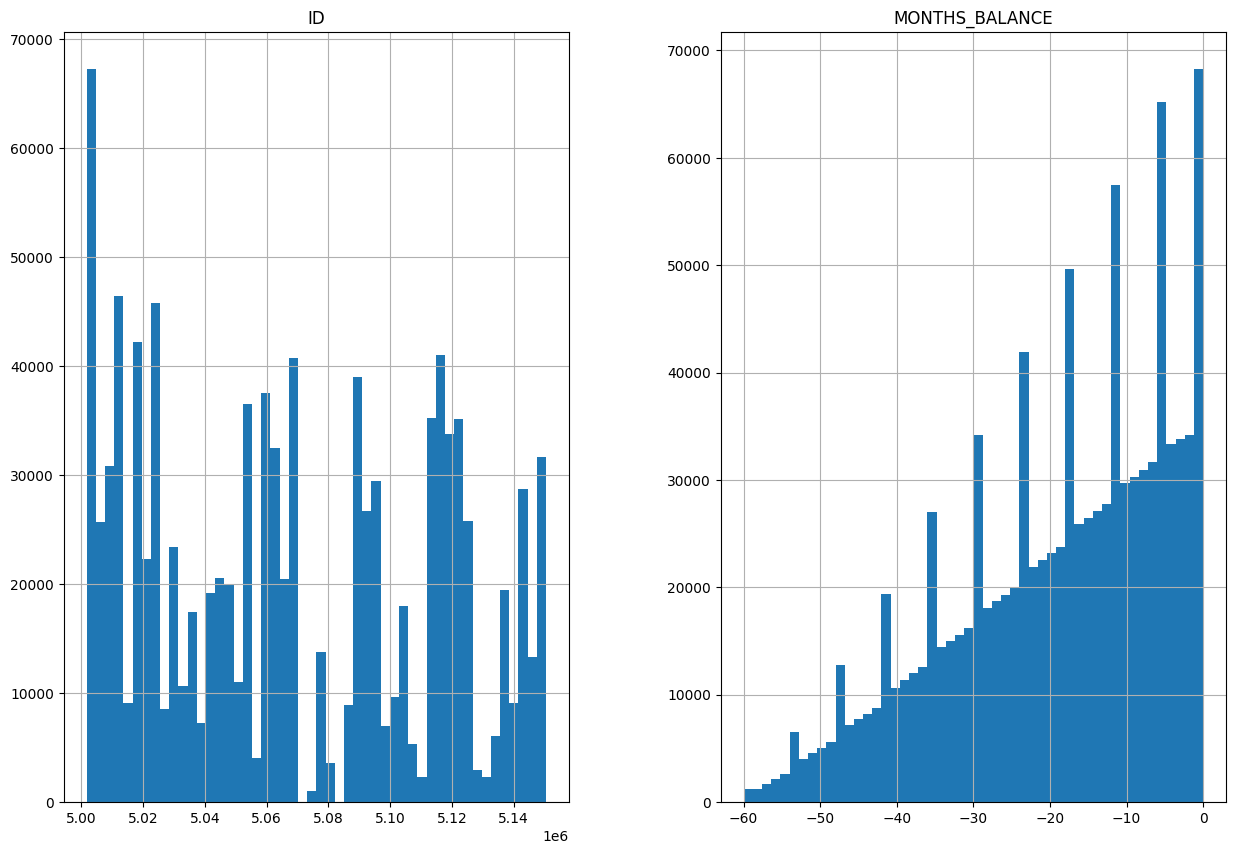

In [21]:
import matplotlib.pyplot as plt
#Negative MONTHS_BALANCE values indicate how many months ago an event occurred.

credit_record.hist(bins=50, figsize=(15, 10))
plt.show()

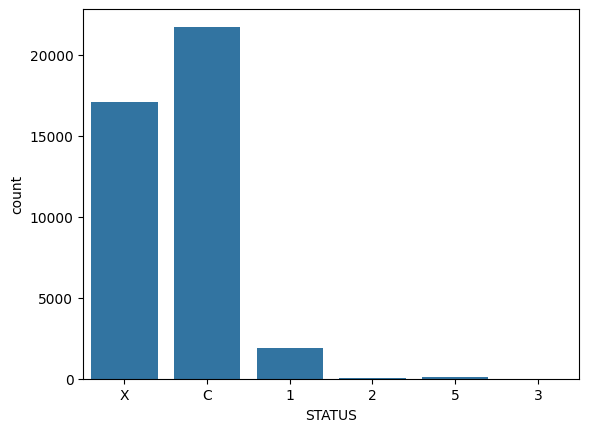

In [40]:
import seaborn as sns

sns.countplot(data=credit_record, x='STATUS')
plt.show()


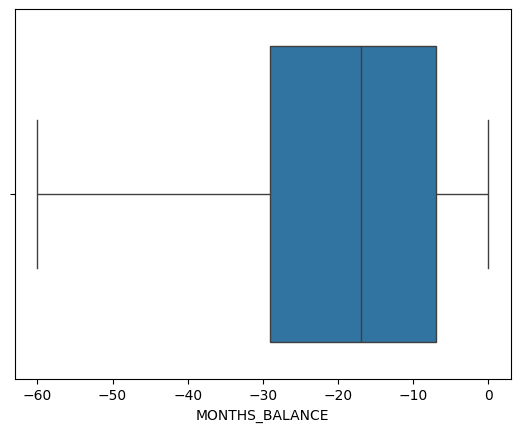

In [23]:
sns.boxplot(data=credit_record, x='MONTHS_BALANCE')
plt.show()


In [24]:
valid_categories = ['C', 'X', 'O','1','2','3','4','5']
credit_record = credit_record[credit_record['STATUS'].isin(valid_categories)]


In [25]:
# Check unique values in column_name after filtering
print(credit_record['STATUS'].unique())


['X' 'C' '1' '2' '3' '4' '5']


In [26]:
print(credit_record.info())
print(credit_record.describe())


<class 'pandas.core.frame.DataFrame'>
Index: 665455 entries, 0 to 1048574
Data columns (total 3 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   ID              665455 non-null  int64 
 1   MONTHS_BALANCE  665455 non-null  int64 
 2   STATUS          665455 non-null  object
dtypes: int64(2), object(1)
memory usage: 20.3+ MB
None
                 ID  MONTHS_BALANCE
count  6.654550e+05   665455.000000
mean   5.068220e+06      -17.575490
std    4.632171e+04       13.149768
min    5.001711e+06      -60.000000
25%    5.023323e+06      -26.000000
50%    5.062034e+06      -15.000000
75%    5.113869e+06       -7.000000
max    5.150487e+06        0.000000


In [27]:
print(credit_record['ID'].duplicated().sum())


624631


In [28]:
# Check a sample of duplicate IDs to understand the data
duplicate_sample = credit_record[credit_record['ID'].duplicated(keep=False)]
print(duplicate_sample.head(20))


         ID  MONTHS_BALANCE STATUS
4   5001712               0      C
5   5001712              -1      C
6   5001712              -2      C
7   5001712              -3      C
8   5001712              -4      C
9   5001712              -5      C
10  5001712              -6      C
11  5001712              -7      C
12  5001712              -8      C
23  5001713               0      X
24  5001713              -1      X
25  5001713              -2      X
26  5001713              -3      X
27  5001713              -4      X
28  5001713              -5      X
29  5001713              -6      X
30  5001713              -7      X
31  5001713              -8      X
32  5001713              -9      X
33  5001713             -10      X


In [39]:
# # Define a function to summarize the statuses for each ID
# def summarize_status(statuses):
#     if any(s in ['0', '1', '2', '3', '4', '5'] for s in statuses):
#         return 1  # Not Approved
#     else:
#         return 0  # Approved

# # Group by ID and summarize STATUS
# credit_record_summary = credit_record.groupby('ID').agg({
#     'STATUS': summarize_status
# }).reset_index()

# print(credit_record_summary.head())


In [31]:
# Check a sample of duplicate IDs to understand the data
duplicate_sample = credit_record[credit_record['ID'].duplicated(keep=False)]
print(duplicate_sample.head(20))


Empty DataFrame
Columns: [ID, STATUS]
Index: []


In [38]:
print(credit_record['STATUS'].unique())


['X' 'C' '1' '2' '5' '3']


In [ ]:
# # Sort by ID and MONTHS_BALANCE in descending order to get the latest months first
# credit_record = credit_record.sort_values(by=['ID', 'MONTHS_BALANCE'], ascending=[True, False])

# # Drop duplicate IDs while keeping the most recent entry
# credit_record = credit_record.drop_duplicates(subset='ID', keep='first')

# print(credit_record.head())


         ID  MONTHS_BALANCE STATUS
0   5001711               0      X
4   5001712               0      C
23  5001713               0      X
45  5001714               0      X
60  5001715               0      X


In [29]:
# Import necessary libraries
import pandas as pd

# Sort by ID and MONTHS_BALANCE in descending order
credit_record = credit_record.sort_values(by=['ID', 'MONTHS_BALANCE'], ascending=[True, False])

# Group by ID and calculate the mode of STATUS
mode_status = credit_record.groupby('ID')['STATUS'].agg(lambda x: x.mode()[0])

# Reset the index to create a DataFrame
credit_record = mode_status.reset_index()

print(credit_record.head())


        ID STATUS
0  5001711      X
1  5001712      C
2  5001713      X
3  5001714      X
4  5001715      X


In [30]:
print(credit_record['ID'].duplicated().sum())


0


In [32]:
print(credit_record.info())
print(credit_record.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40824 entries, 0 to 40823
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   ID      40824 non-null  int64 
 1   STATUS  40824 non-null  object
dtypes: int64(1), object(1)
memory usage: 638.0+ KB
None
                 ID
count  4.082400e+04
mean   5.069850e+06
std    4.547569e+04
min    5.001711e+06
25%    5.025759e+06
50%    5.065554e+06
75%    5.113966e+06
max    5.150487e+06


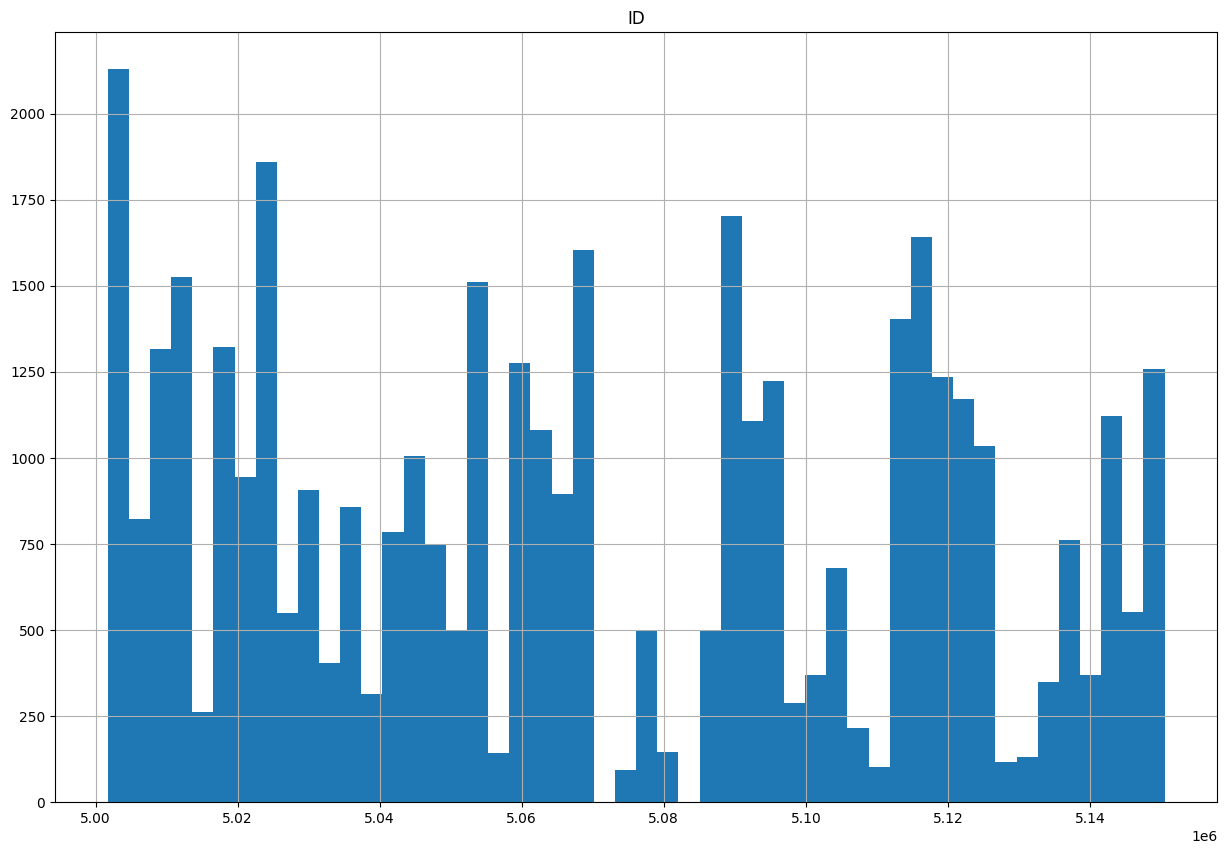

In [33]:
import matplotlib.pyplot as plt
#Negative MONTHS_BALANCE values indicate how many months ago an event occurred.

credit_record.hist(bins=50, figsize=(15, 10))
plt.show()

In [37]:
# Group by ID and check if all rows have a unique STATUS
status_check = credit_record.groupby('ID')['STATUS'].nunique().reset_index()
status_check.rename(columns={'STATUS': 'unique_status_count'}, inplace=True)

print(status_check)


            ID  unique_status_count
0      5001711                    1
1      5001712                    1
2      5001713                    1
3      5001714                    1
4      5001715                    1
...        ...                  ...
40819  5150481                    1
40820  5150482                    1
40821  5150483                    1
40822  5150484                    1
40823  5150487                    1

[40824 rows x 2 columns]


In [35]:
print(credit_record.info())
print(credit_record.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40824 entries, 0 to 40823
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   ID      40824 non-null  int64 
 1   STATUS  40824 non-null  object
dtypes: int64(1), object(1)
memory usage: 638.0+ KB
None
                 ID
count  4.082400e+04
mean   5.069850e+06
std    4.547569e+04
min    5.001711e+06
25%    5.025759e+06
50%    5.065554e+06
75%    5.113966e+06
max    5.150487e+06


In [41]:
# Check for duplicates in the dataset
num_duplicates = credit_record.duplicated().sum()
print(f"Number of duplicate rows: {num_duplicates}")


Number of duplicate rows: 0
